In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [2]:
mbti_data = pd.read_csv('projectData/mbti_data.csv')
mbti_data.head()

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY_LEVEL,PAIN_1,PAIN_2,PAIN_3,PAIN_4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,53,62,125,Female,1,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,1
1,52,69,157,Male,3,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,2
2,30,69,200,Male,3,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,1
3,51,66,175,Male,2,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,4
4,45,63,199,Female,2,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,1


 #### Check the basic statistics

In [3]:
print("Data type : ", type(mbti_data))
print("Data dims : ", mbti_data.shape)
print(mbti_data.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (96, 19)
AGE                 int64
HEIGHT              int64
WEIGHT              int64
SEX                object
ACTIVITY_LEVEL      int64
PAIN_1            float64
PAIN_2            float64
PAIN_3            float64
PAIN_4            float64
MBTI               object
E                   int64
I                   int64
S                   int64
N                   int64
T                   int64
F                   int64
J                   int64
P                   int64
POSTURE             int64
dtype: object


#### Information about the variables

In [4]:
mbti_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             96 non-null     int64  
 1   HEIGHT          96 non-null     int64  
 2   WEIGHT          96 non-null     int64  
 3   SEX             96 non-null     object 
 4   ACTIVITY_LEVEL  96 non-null     int64  
 5   PAIN_1          96 non-null     float64
 6   PAIN_2          96 non-null     float64
 7   PAIN_3          96 non-null     float64
 8   PAIN_4          96 non-null     float64
 9   MBTI            96 non-null     object 
 10  E               96 non-null     int64  
 11  I               96 non-null     int64  
 12  S               96 non-null     int64  
 13  N               96 non-null     int64  
 14  T               96 non-null     int64  
 15  F               96 non-null     int64  
 16  J               96 non-null     int64  
 17  P               96 non-null     int64

#### Drop columns that are not needed

In [5]:
mbti_data.drop(labels=None, axis=0, index=None, columns=['AGE','HEIGHT','WEIGHT','SEX'], inplace=False)

,ACTIVITY_LEVEL,PAIN_1,PAIN_2,PAIN_3,PAIN_4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,1
1,3,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,2
2,3,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,1
3,2,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,4
4,2,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2,5.0,0.0,5.0,7.0,ENFJ,19,2,9,17,2,22,12,10,2
92,2,0.0,0.0,0.0,3.0,ESTP,19,2,22,4,19,5,2,20,2
93,2,0.0,4.0,0.0,0.0,ESFJ,11,10,17,9,6,18,13,9,2
94,2,2.0,0.0,0.0,0.0,ENFP,12,9,9,17,6,18,2,20,1


#### Start off the Exploratory Data Analysis with a box plot of Posture against MBTI types

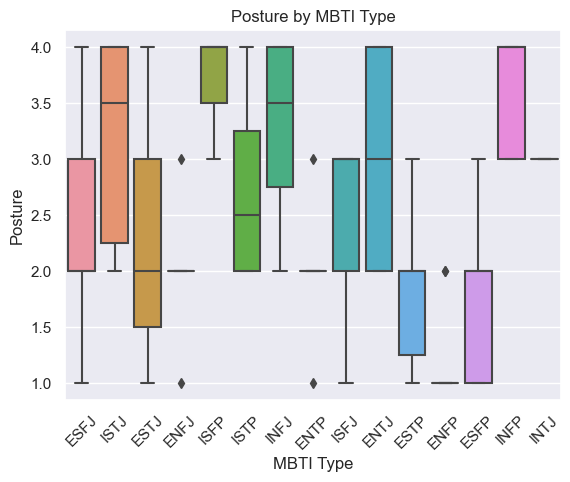

In [16]:
# Box plot to compare posture across MBTI types
sb.boxplot(x='MBTI', y='POSTURE', data=mbti_data)
plt.title('Posture by MBTI Type')
plt.xlabel('MBTI Type')
plt.ylabel('Posture')
plt.xticks(rotation=45)
plt.show()

Analyzing the relationship between `MBTI` and `posture` through a boxplot may not provide sufficient insight or clarity due to the diversity within each MBTI type. To achieve a more meaningful and specific analysis, it's essential to break down the `MBTI components` and compare them with `posture`. 

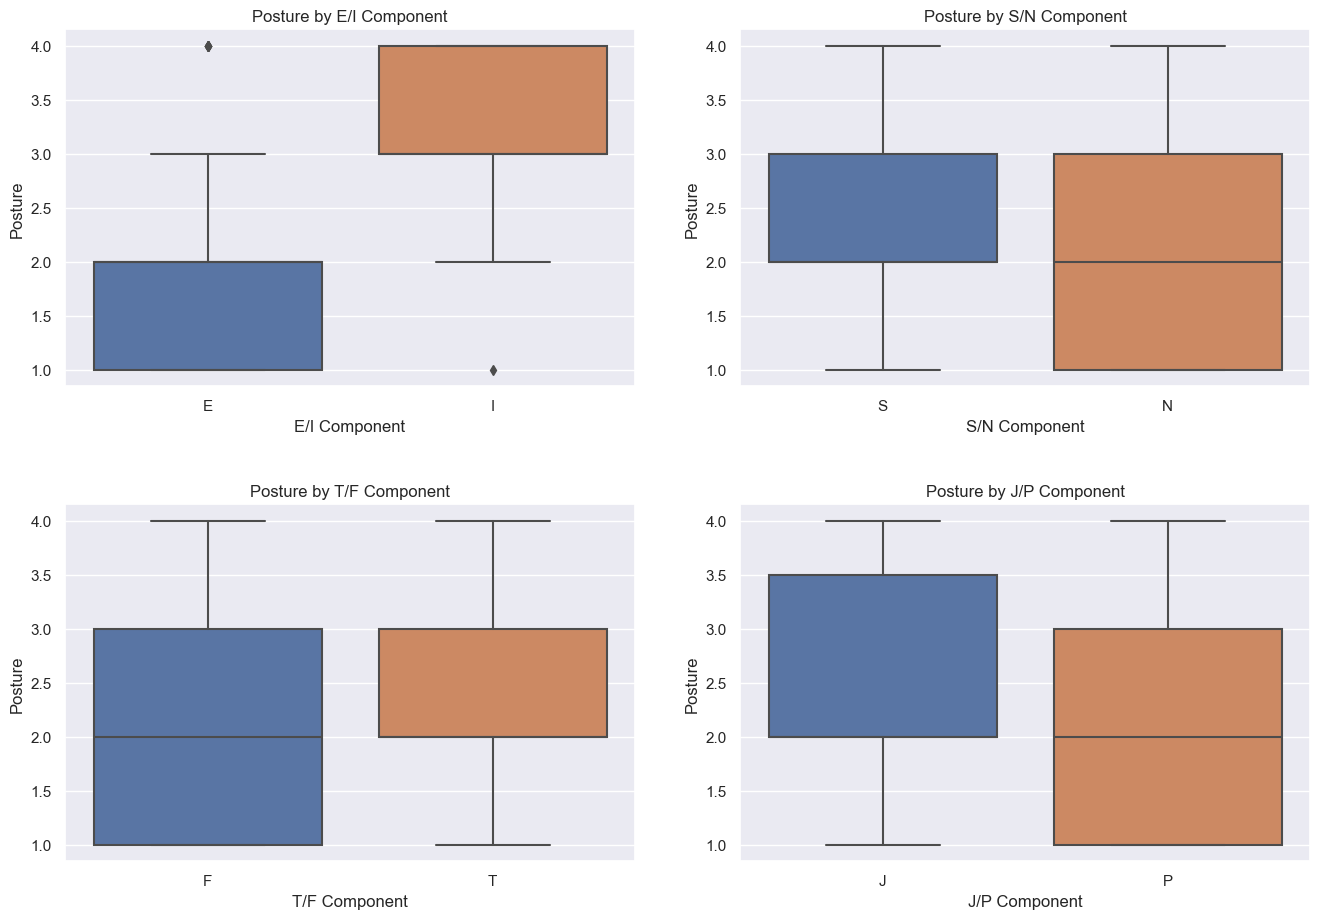

In [17]:
# Extract individual components (E, I, S, N, T, F, J, P) from MBTI column
mbti_data['E/I'] = mbti_data['MBTI'].str[0]
mbti_data['S/N'] = mbti_data['MBTI'].str[1]
mbti_data['T/F'] = mbti_data['MBTI'].str[2]
mbti_data['J/P'] = mbti_data['MBTI'].str[3]

# Define pairs of components
component_pairs = {'E/I': 'E/I', 'S/N': 'S/N', 'T/F': 'T/F', 'J/P': 'J/P'}

# Create box plots for each component pair comparison
plt.figure(figsize=(14, 10))  
for i, (component_pair, component) in enumerate(component_pairs.items()):
    plt.subplot(2, 2, i + 1)  # Use i + 1 to set the subplot position explicitly
    sb.boxplot(x=component_pair, y='POSTURE', data=mbti_data)
    plt.title(f'Posture by {component} Component')
    plt.xlabel(f'{component} Component')
    plt.ylabel('Posture')

plt.tight_layout(pad=3)  # Adjust the padding between subplots
plt.show()

#### Change to do a violin plot instead in order to visualise the distribution of the sample size across each component

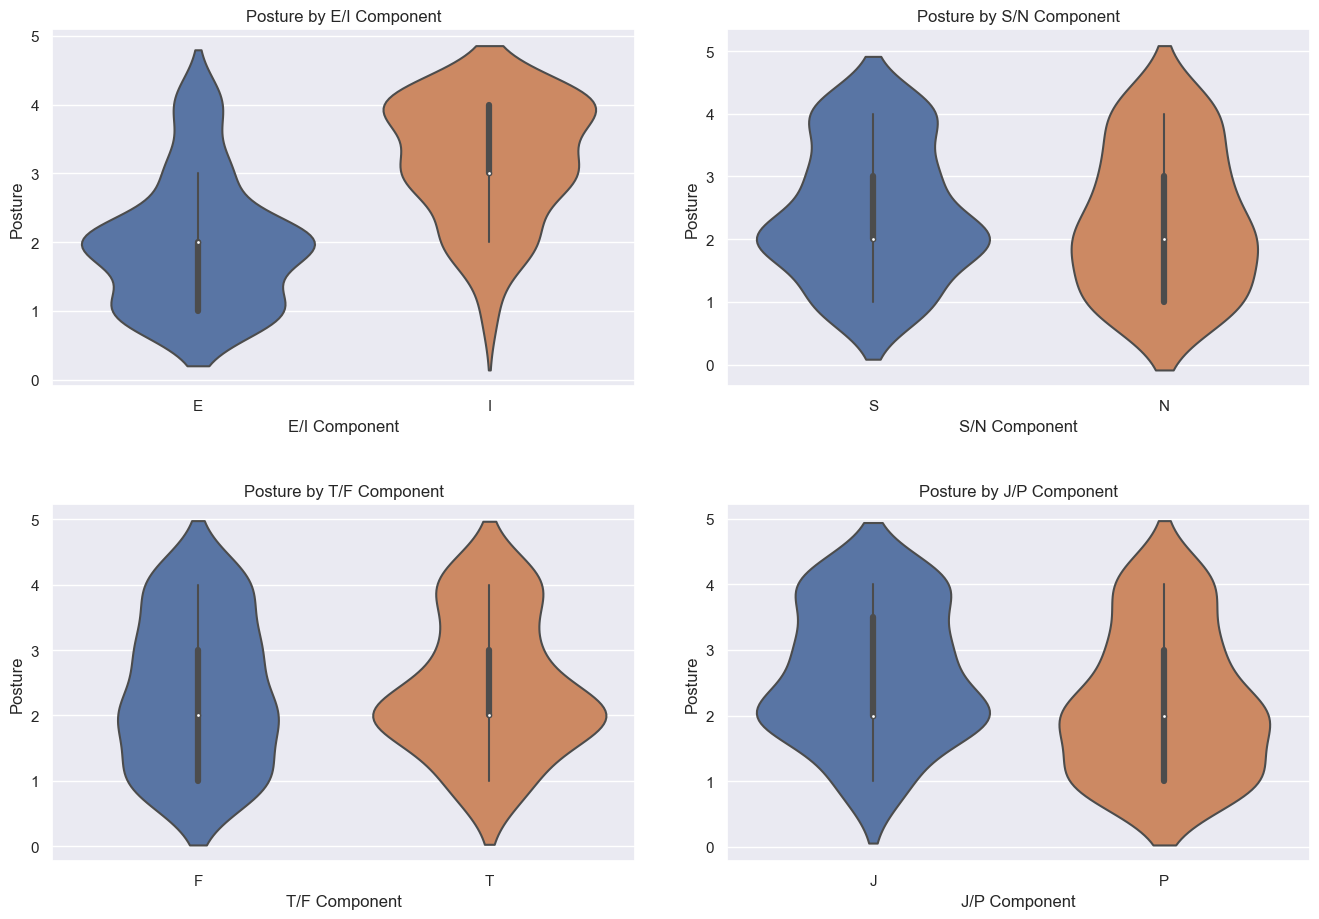

In [22]:
# Create violin plots for each component pair comparison
plt.figure(figsize=(14, 10))  
for i, (component_pair, component) in enumerate(component_pairs.items()):
    plt.subplot(2, 2, i + 1)  # Use i + 1 to set the subplot position explicitly
    sb.violinplot(x=component_pair, y='POSTURE', data=mbti_data)
    plt.title(f'Posture by {component} Component')
    plt.xlabel(f'{component} Component')
    plt.ylabel('Posture')

plt.tight_layout(pad=3)  # Adjust the padding between subplots
plt.show()

From the violin plot above, it seems that the `I component` has better `posture` across the sample size compared to the `E component`, while the rest of the pairs are similar.

#### Finding if there is a difference between the genders

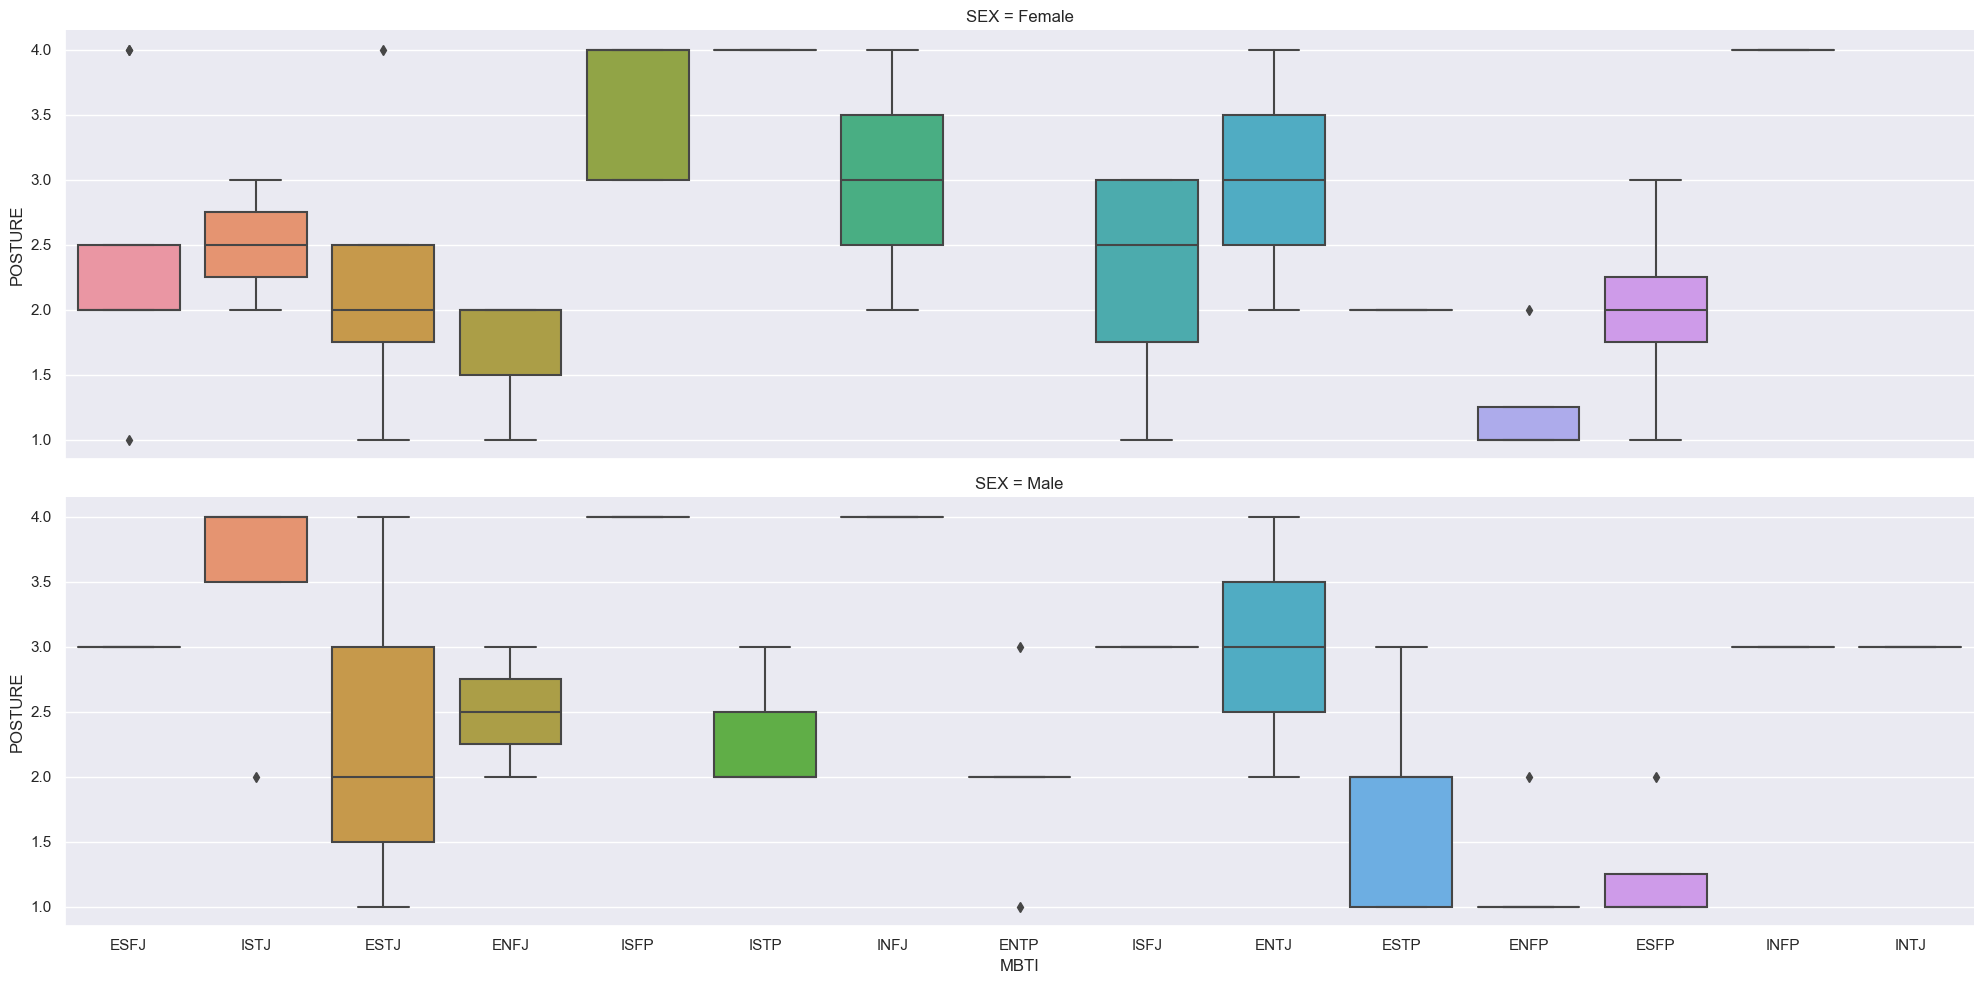

In [38]:
sb.catplot(x = 'MBTI', y = 'POSTURE', row = 'SEX', data = mbti_data, kind = 'box', aspect = 4) 